In [41]:
import pandas as pd
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from tqdm.notebook import tqdm

In [2]:
highlight_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/utils/data/nfl_ngs_highlights_index.tsv'
highlight_df = pd.read_csv(highlight_url, sep ='\t')

In [3]:
print(highlight_df.loc[(highlight_df.team == 'DAL') & (highlight_df.playId == 1340)].playDesc.values)

['(12:23) (No Huddle, Shotgun) D.Prescott pass deep left to A.Cooper to WAS 16 for 48 yards (K.Ladler). Penalty on WAS-R.Anderson, Defensive Offside, declined.']


In [10]:
highlight_df.tail()

,playKey,playDesc,team,season,week,gameId,playId
562,563,"(1:29) (No Huddle, Shotgun) D.Haskins pass sho...",WAS,2019,4,2019092907,2823
563,564,"(9:39) S.Sims right end for 65 yards, TOUCHDOW...",WAS,2019,5,2019100609,431
564,565,(10:11) (Shotgun) D.Haskins pass short right t...,WAS,2019,11,2019111707,3624
565,566,(1:22) (Shotgun) D.Haskins pass short middle t...,WAS,2019,14,2019120803,3729
566,567,(1:23) D.Haskins pass short middle to T.McLaur...,WAS,2019,15,2019121508,700


In [16]:
highlight_df['play_idx'] = highlight_df['season'].astype(str) + \
    '_' + highlight_df['team'] + \
    '_' + highlight_df['gameId'].astype(str) + \
    '_' + highlight_df['playId'].astype(str)

In [71]:
plays_lst = []
for x in tqdm(highlight_df.play_idx.iloc[0:100]):
    play_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/play_data/{}.tsv'.format(x)
    play_df = pd.read_csv(play_url, sep = '\t')
    play_df['play_idx'] = x
    #Filter for ball snap frame
    play_df = play_df.query("event == 'ball_snap'")
    plays_lst.append(play_df)

In [67]:
plays_df = pd.concat(plays_lst)

In [70]:
plays_df.query('play_idx == "2017_MIN_2018011401_4497"').event.value_counts()

line_set                46
pass_forward            23
pass_arrived            23
timeout_booth_review    23
pass_outcome_caught     23
huddle_break_offense    23
ball_snap               23
touchdown               23
Name: event, dtype: int64

In [59]:
plays_df.shape

(2299, 37)

In [60]:
len(plays_df.play_idx.unique())

100

In [61]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

In [62]:
plays_to_plot = plays_df['play_idx'].unique()[0:10]

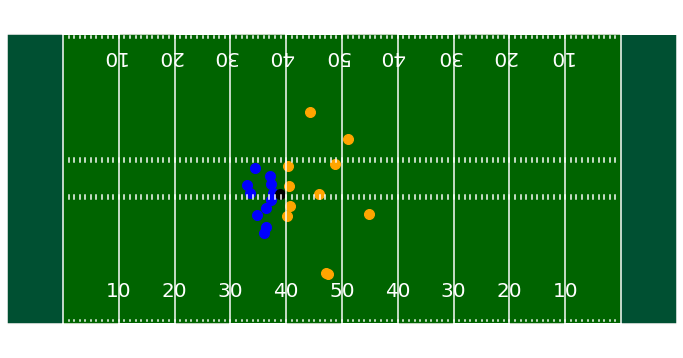

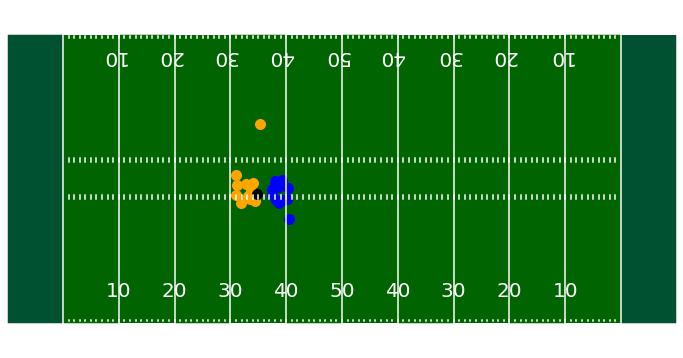

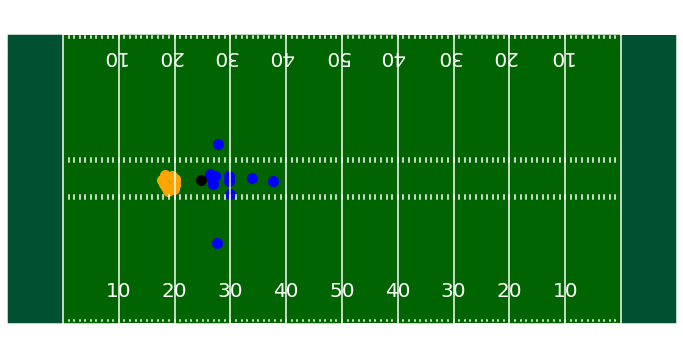

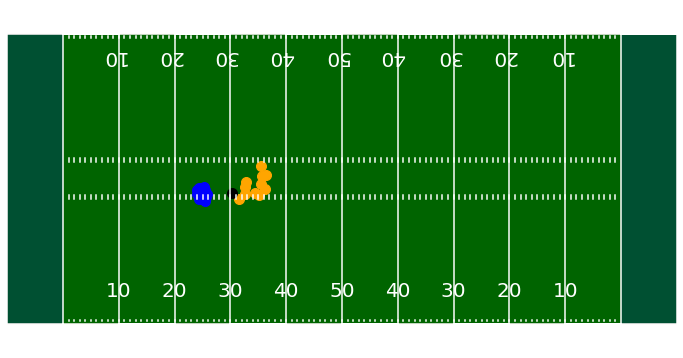

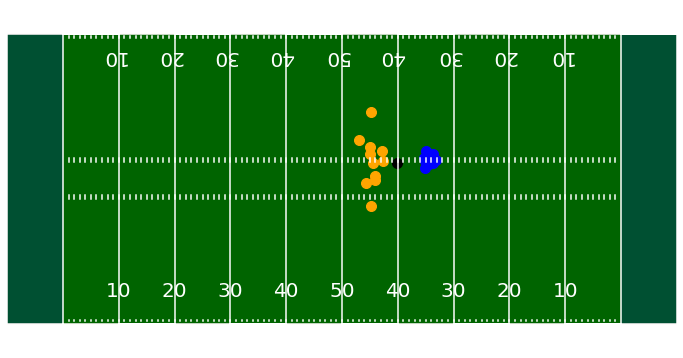

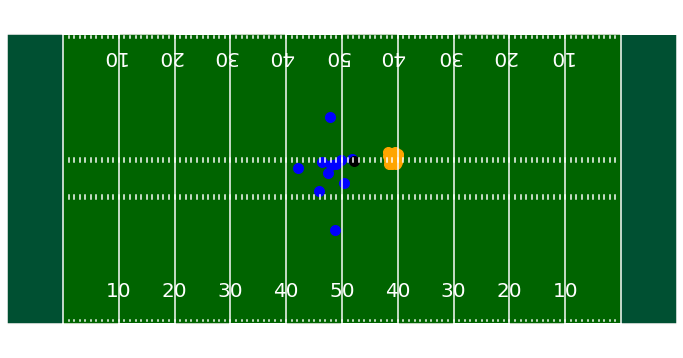

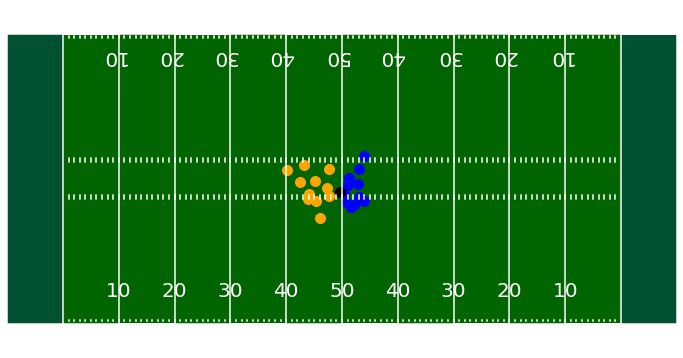

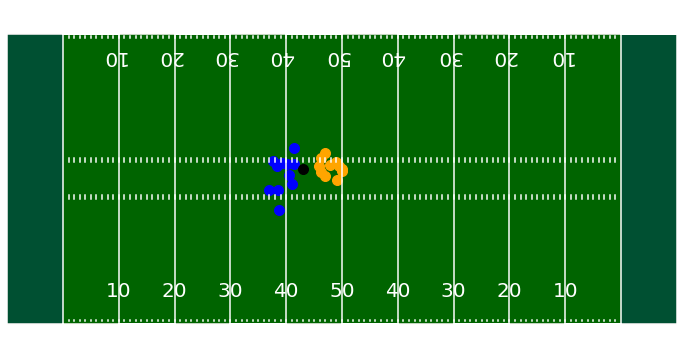

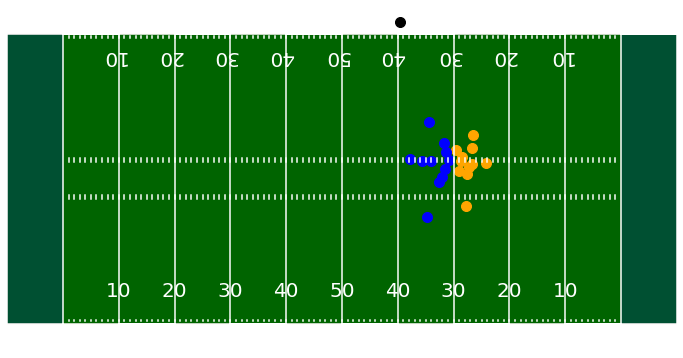

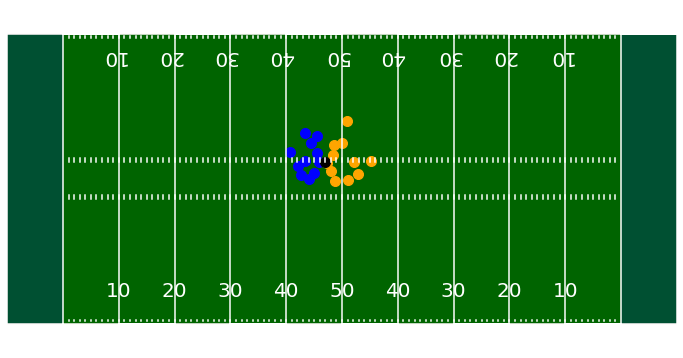

In [64]:
for play in tqdm(plays_to_plot):
    play_df_to_plot = plays_df.loc[plays_df.play_idx == play]
    yl = single_frame.yardlineNumber.reset_index(drop=True)[0]
    fig, ax = create_football_field(highlight_line=False,
                                #highlight_line_number=yl
                               )


    play_df_to_plot.query('homeTeamFlag == 0') \
        .plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=100, legend='Away')

    play_df_to_plot.query('homeTeamFlag == 1') \
        .plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=100, legend='Home')

    play_df_to_plot.query("displayName == 'ball'") \
        .plot(x='x', y='y', kind='scatter', ax=ax, color='black', s = 100, legend='Ball')


    #plt.title('Play # 2019122904_1340')
    #plt.legend()
    plt.show()

In [48]:
#fig.savefig('testingSave.png')